# 1 - Perkenalan

- Nama : Luvi Puspitasari Batch : FTDS-011 
- Dataset : Cencus Adukt Income
- Objective : Memprediksi range pendapatan
- Data Source : https://console.cloud.google.com/bigquery?sq=540278567683:9c26e8ca9c254adbb2808fce1272ac17

# 2 - Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Model Definition
from sklearn.linear_model import LogisticRegression

# Model Training
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Model Evaluation
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix


# 3 - Data Loading

> Salinan query di Google Cloud Platform

SELECT
  age,
  workclass,
  education,
  education_num,
  marital_status,
  occupation,
  relationship,
  race,
  sex,
  capital_gain,
  capital_loss,
  hours_per_week,
  native_country,
  income_bracket,
FROM `bigquery-public-data.ml_datasets.census_adult_income`
where 
  workclass!=' ?' and hours_per_week<100
limit 23928

Dataset berikut berisikan Data Sensus Income yang mana ada beberapa penjelasan dibawah ini :
- `age` : range usia dari 17 - 90 tahun
- `workclass` : `lingkungan kerja` (Private, Self-emp-inc, Local-gov, Self-emp-not-inc, Federal-gov, State-gov, Without-pay, Never-worked)
- `education` : 9th,  10th,  11th,  12th,  1st-4th,  5th-6th, 7th-8th, HS-grad,  Masters,  Assoc-voc,  Bachelors, Doctorate,  Preschool,  Assoc-acdm,  Prof-school, Some-college
- `education_num` :  5,  6,  7,  8,  2,  3,  4,  9, 14, 11, 13, 16,  1, 12, 15, 10)
- `marital_status` :  Married-civ-spouse,  Married-AF-spouse,  Never-married, Divorced,  Married-spouse-absent,  Separated,  Widowed
- `occupation` :  Other-service,  Exec-managerial,  Machine-op-inspct, Tech-support,  Adm-clerical,  Farming-fishing, Priv-house-serv,  Sales,  Protective-serv Transport-moving,  Handlers-cleaners,  Craft-repair, Prof-specialty,  ?,  Armed-Forces
- `relationship` : Wife, Husband, Own-child, Unmarried, Not-in-family
- `race` = Black, Asian-Pac-Islander, White, Amer-Indian-Eskimo, Other
- `sex / gender` =  Female,  Male
- `capital_gain` = pendapatan
- `capital_loss` = potongan gaji
- `hours_per_week` = jam kerja dalam sepekan
- `native_country` =  United-States,  Portugal,  Yugoslavia,  Haiti, Dominican-Republic,  Mexico,  Guatemala,  ?,  Japan, Hong,  Philippines,  El-Salvador,  Vietnam,  Italy,Laos,  Canada,  Puerto-Rico,  Jamaica,  South, Trinadad&Tobago,  Greece,  Peru,  Iran,  Germany, Columbia,  Scotland,  China,  Nicaragua,  Cuba, England,  Poland,  Outlying-US(Guam-USVI-etc),  Taiwan, Hungary,  India,  Ecuador,  Thailand,  Cambodia, Honduras,  France,  Ireland
- `income_bracket` =  <=50K,  >50K


In [2]:
# Load Dataset

data = pd.read_csv('h8dsft_P1G2_luvi_Puspitasari.csv')
data.T

,0,1,2,3,4,5,6,7,8,9,...,23918,23919,23920,23921,23922,23923,23924,23925,23926,23927
age,39,72,45,31,55,30,46,28,37,40,...,33,28,45,30,36,48,31,37,30,19
workclass,Private,Private,Private,Private,Private,Private,Self-emp-inc,Private,Private,Local-gov,...,Private,Private,Private,Private,Private,Private,Private,Self-emp-not-inc,Private,Private
education,9th,9th,9th,9th,9th,9th,9th,9th,9th,9th,...,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad
education_num,5,5,5,5,5,5,5,5,5,5,...,9,9,9,9,9,9,9,9,9,9
marital_status,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,...,Never-married,Never-married,Never-married,Separated,Never-married,Never-married,Never-married,Never-married,Divorced,Never-married
occupation,Other-service,Exec-managerial,Machine-op-inspct,Exec-managerial,Tech-support,Machine-op-inspct,Adm-clerical,Machine-op-inspct,Machine-op-inspct,Other-service,...,Sales,Other-service,Handlers-cleaners,Craft-repair,Adm-clerical,Handlers-cleaners,Machine-op-inspct,Craft-repair,Transport-moving,Adm-clerical
relationship,Wife,Wife,Wife,Wife,Wife,Wife,Wife,Wife,Wife,Wife,...,Not-in-family,Not-in-family,Not-in-family,Not-in-family,Not-in-family,Not-in-family,Not-in-family,Not-in-family,Not-in-family,Not-in-family
race,Black,Asian-Pac-Islander,White,White,White,White,White,White,Black,White,...,White,White,White,White,White,White,White,White,White,White
sex,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,...,Male,Male,Female,Male,Female,Male,Male,Male,Male,Female
capital_gain,3411,0,0,0,0,0,0,0,0,0,...,3325,0,0,0,4865,0,0,0,0,0


Dataset Census Adult Income memiliki 14 rows dan 23.928 columns

In [3]:
# Duplicate Dataset

data_copy = data.copy()

In [4]:
# Rename Columns

data.rename(columns={'sex' : 'gender'}, inplace=True)
data.T

,0,1,2,3,4,5,6,7,8,9,...,23918,23919,23920,23921,23922,23923,23924,23925,23926,23927
age,39,72,45,31,55,30,46,28,37,40,...,33,28,45,30,36,48,31,37,30,19
workclass,Private,Private,Private,Private,Private,Private,Self-emp-inc,Private,Private,Local-gov,...,Private,Private,Private,Private,Private,Private,Private,Self-emp-not-inc,Private,Private
education,9th,9th,9th,9th,9th,9th,9th,9th,9th,9th,...,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad
education_num,5,5,5,5,5,5,5,5,5,5,...,9,9,9,9,9,9,9,9,9,9
marital_status,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,...,Never-married,Never-married,Never-married,Separated,Never-married,Never-married,Never-married,Never-married,Divorced,Never-married
occupation,Other-service,Exec-managerial,Machine-op-inspct,Exec-managerial,Tech-support,Machine-op-inspct,Adm-clerical,Machine-op-inspct,Machine-op-inspct,Other-service,...,Sales,Other-service,Handlers-cleaners,Craft-repair,Adm-clerical,Handlers-cleaners,Machine-op-inspct,Craft-repair,Transport-moving,Adm-clerical
relationship,Wife,Wife,Wife,Wife,Wife,Wife,Wife,Wife,Wife,Wife,...,Not-in-family,Not-in-family,Not-in-family,Not-in-family,Not-in-family,Not-in-family,Not-in-family,Not-in-family,Not-in-family,Not-in-family
race,Black,Asian-Pac-Islander,White,White,White,White,White,White,Black,White,...,White,White,White,White,White,White,White,White,White,White
gender,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,...,Male,Male,Female,Male,Female,Male,Male,Male,Male,Female
capital_gain,3411,0,0,0,0,0,0,0,0,0,...,3325,0,0,0,4865,0,0,0,0,0


In [5]:
# Check Dataset - 1

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23928 entries, 0 to 23927
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             23928 non-null  int64 
 1   workclass       23928 non-null  object
 2   education       23928 non-null  object
 3   education_num   23928 non-null  int64 
 4   marital_status  23928 non-null  object
 5   occupation      23928 non-null  object
 6   relationship    23928 non-null  object
 7   race            23928 non-null  object
 8   gender          23928 non-null  object
 9   capital_gain    23928 non-null  int64 
 10  capital_loss    23928 non-null  int64 
 11  hours_per_week  23928 non-null  int64 
 12  native_country  23928 non-null  object
 13  income_bracket  23928 non-null  object
dtypes: int64(5), object(9)
memory usage: 2.6+ MB


In [6]:
# Check Dataset - 2

data.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,23928.000000,23928.000000,23928.000000,23928.000000,23928.000000
mean,38.897359,9.894433,1191.250125,92.366057,40.952942
std,13.139249,2.593118,7891.196265,412.514475,12.157282
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,9.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


1. Rata-rata Usia dalama dataset ada di angka 38 tahun, dengan usia paling muda 17 tahun dan usia maksimal di angka 90 tahun
2. Rata-rata pendapatan per minggu `$ 1.191`, pendapatan paling sedikit `$ 0`, dan paling tinggi `$ 99999`, sekilas kita melihat ada missing values.
3. Potongan gaji rata-rata di `$ 92` dengan paling sedikit potongan ada di `$ 0` dan paling tinggi ada di `$ 99999`, kemungkinan ada missing values akrena terdapat angka yang aneh
4. Hours per week, jam kerja maksimal ada di 99 jam dalam 1 minggu, dan paling sedikit ada di 1 jam per minggu, dengan rerata 40 jam seminggu.

In [7]:
print(data.shape)
data.head(10).T

(23928, 14)


,0,1,2,3,4,5,6,7,8,9
age,39,72,45,31,55,30,46,28,37,40
workclass,Private,Private,Private,Private,Private,Private,Self-emp-inc,Private,Private,Local-gov
education,9th,9th,9th,9th,9th,9th,9th,9th,9th,9th
education_num,5,5,5,5,5,5,5,5,5,5
marital_status,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse
occupation,Other-service,Exec-managerial,Machine-op-inspct,Exec-managerial,Tech-support,Machine-op-inspct,Adm-clerical,Machine-op-inspct,Machine-op-inspct,Other-service
relationship,Wife,Wife,Wife,Wife,Wife,Wife,Wife,Wife,Wife,Wife
race,Black,Asian-Pac-Islander,White,White,White,White,White,White,Black,White
gender,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female
capital_gain,3411,0,0,0,0,0,0,0,0,0


In [8]:
data.tail(10).T

,23918,23919,23920,23921,23922,23923,23924,23925,23926,23927
age,33,28,45,30,36,48,31,37,30,19
workclass,Private,Private,Private,Private,Private,Private,Private,Self-emp-not-inc,Private,Private
education,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad,HS-grad
education_num,9,9,9,9,9,9,9,9,9,9
marital_status,Never-married,Never-married,Never-married,Separated,Never-married,Never-married,Never-married,Never-married,Divorced,Never-married
occupation,Sales,Other-service,Handlers-cleaners,Craft-repair,Adm-clerical,Handlers-cleaners,Machine-op-inspct,Craft-repair,Transport-moving,Adm-clerical
relationship,Not-in-family,Not-in-family,Not-in-family,Not-in-family,Not-in-family,Not-in-family,Not-in-family,Not-in-family,Not-in-family,Not-in-family
race,White,White,White,White,White,White,White,White,White,White
gender,Male,Male,Female,Male,Female,Male,Male,Male,Male,Female
capital_gain,3325,0,0,0,4865,0,0,0,0,0


# 4 - Exploratory Data Analysis (EDA)

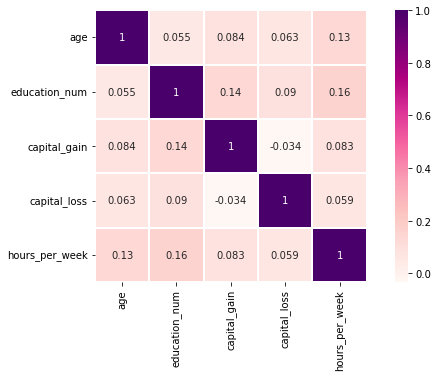

In [9]:
# Check korelasi antara kolom

# Heatmap
corrmat = data.corr()
top_corr_feature = corrmat.index

plt.figure(figsize=(10,5))
g = sns.heatmap(data[top_corr_feature].corr(), annot=True, cmap='RdPu', square=5, linewidths=0.02)

> Untuk second layer kolom target `income bracket` menggunakan capital gain. 
dalam hal ini, tingkatan `education` sangat menentukan dalam menentukan pendapatan setiap orang

**Univariate Analysis**

*Numerical Variables*

In [10]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64','Int64']).dtypes

age               int64
education_num     int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
dtype: object

**Bivariate Analysis**

Bivariate analysis digunakan untuk untuk menganalisa 2 variables dan menemukan sebuah relasi

<AxesSubplot:xlabel='capital_gain'>

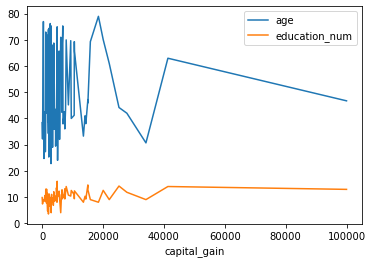

In [11]:
source_price = data.groupby('capital_gain').mean()[['age', 'education_num']]
source_price.plot.line()

Sekilas bisa dilihat bahwa Age tidak bisa menentukan capital gain seseorang, karen banyak faktor lain yang mempengaruhi

**Distance vs Price**

In [12]:
data.dtypes

age                int64
workclass         object
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
gender            object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income_bracket    object
dtype: object

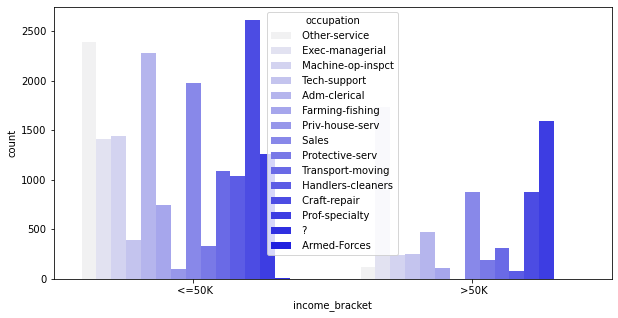

In [13]:
# Create Histogram and Scatter Plot

plt.figure(figsize=(10,5))
sns.countplot(x='income_bracket', hue='occupation', data=data, color='blue')
plt.show()

grafik ini diasumsikan seperti piramida yang mana orang-orang dengan pendapatan besar lebih sedikit dibandingkan penda[atan yang kecil. Occupation mempengaruhi income bracket.Bar chart menunjukkan bahwa mulai dari Craft-repair, sampai dengan Armed-Forces memiliki Pendapatan yang tinggi.

# 5 - Data Preprocessing

**Data Splitting**

Pada data splitting akan dibagi menjadi 3
1. Inference Set : 
2. Train Set : digunakan untuk melatih algoritma dalam mencari model yang sesuai,
3. Test Set : dipakai untuk menguji dan mengetahui performa model yang didapatkan pada tahapan testing

Proporsi split data 80% untuk train-set dan 20% untuk test-set

In [14]:
# Set Random State

random_state = 17

#### Inference Set Preparation

In [15]:
# Inference Set Preparation
# Digunakan untuk mencoba masukkan data baru

inf_set = data.sample(15, random_state=random_state)
inf_set.shape

(15, 14)

In [16]:
# Exclude Inference-Set
# Data akan digunakan testing pada saat model sudah fix

train_test_set = data.drop(inf_set.index)
train_test_set.reset_index(drop=True, inplace=True)

print('Dataset before exclude Inference-set :', data.shape)
print('Dataset after exclude Inference-set :', train_test_set.shape)

Dataset before exclude Inference-set : (23928, 14)
Dataset after exclude Inference-set : (23913, 14)


#### Splitting Data

In [17]:
# Splitting Dataset

# Data yang akan digunakan diluar data target
X = train_test_set.drop(['income_bracket'], axis=1)

# Data yang memiliki target
y = train_test_set['income_bracket']

In [18]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (19130, 13)
Test Size :  (4783, 13)


#### Detect Outlier


- Heatmap diatas menunjukkan korealsi antar tiap kolom, sehingga untuk outlier kali ini hanya dibatas pada kolom yang berkorelasi dengan `income_bracket`, antara lain :
    1. age,
    2. capital gain,
    3. capital loss,
    4. hours per week

*Mendefinisikan Normal Distirbusi*

In [19]:
def out_std(data, column):
    global lower, upper
    # Calculate the mean and std of the data frame
    data_mean, data_std = data[column].mean(), data[column].std()

    # Calculate the cutoff value
    cut_off = data_std * 3

    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off

    print('The lower bound value is', lower)
    print('The upper bound value is', upper)

    # Procentage the outlier
    total_count = lower + upper
    percentage = format(len(data[data[column] > upper])/len(data)*100)
        
    # Calculate the number of records below and above lower and above bound value respectively
        
    df1 = data[data[column] > upper] 
    df2 = data[data[column] < lower]
    i = ('Total number of outlier are', df1.shape[0] + df2.shape[0], 'Percentage', percentage)


In [20]:
print(" -------------Detection age Outlier--------------")
out_std(data, 'age')
print(" -------------Detection capital_gain Outlier--------------")
out_std(data, 'capital_gain')
print(" -------------Detection capital_loss Outlier--------------")
out_std(data, 'capital_loss')
print(" -------------Detection hours_per_week Outlier--------------")
out_std(data, 'hours_per_week')

 -------------Detection age Outlier--------------
The lower bound value is -0.5203876862190668
The upper bound value is 78.31510517200977
 -------------Detection capital_gain Outlier--------------
The lower bound value is -22482.338670587887
The upper bound value is 24864.838921340146
 -------------Detection capital_loss Outlier--------------
The lower bound value is -1145.177369819774
The upper bound value is 1329.9094828254579
 -------------Detection hours_per_week Outlier--------------
The lower bound value is 4.481094913334545
The upper bound value is 77.424789406291


*Mendefiniskan IQR, lower dan upper*

In [21]:
def out_iqr(data, column):
    global lower, upper
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)

    # calculate the IQR
    iqr = q75 - q25

    #calculate the outlier cutoff
    cut_off = iqr * 1.5


    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off

    # Procentage the outlier
    total_count = lower + upper
    percentage = format(len(data[data[column] > upper])/len(data)*100)

    print('The IQR is', iqr, 'The lower bound is', lower, 'The upper bound value is', upper, 'Percentage', percentage)

    # calculate the number of records below and above lower and above bound value respectively
    df1 = data[data[column] > upper]
    df2 = data[data[column] < lower]
    
    return print('Total number of outliers are', df1.shape[0] + df2.shape[0])

In [22]:
print(" -------------Detection age Outlier--------------")
out_iqr(data, 'age')
print(" -------------Detection capital_gain Outlier--------------")
out_iqr(data, 'capital_gain')
print(" -------------Detection capital_loss	 Outlier--------------")
out_iqr(data, 'capital_loss')
print(" -------------Detection hours_per_week	 Outlier--------------")
out_iqr(data, 'hours_per_week')

 -------------Detection age Outlier--------------
The IQR is 19.0 The lower bound is 0.5 The upper bound value is 76.5 Percentage 0.4555332664660649
Total number of outliers are 109
 -------------Detection capital_gain Outlier--------------
The IQR is 0.0 The lower bound is 0.0 The upper bound value is 0.0 Percentage 8.889167502507522
Total number of outliers are 2127
 -------------Detection capital_loss	 Outlier--------------
The IQR is 0.0 The lower bound is 0.0 The upper bound value is 0.0 Percentage 4.94399866265463
Total number of outliers are 1183
 -------------Detection hours_per_week	 Outlier--------------
The IQR is 5.0 The lower bound is 32.5 The upper bound value is 52.5 Percentage 11.350718823136074
Total number of outliers are 6389


In [23]:

def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(8, 4))

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

hour_upper_limit :  52.5
hour_lower_limit :  32.5 

[False False False False  True False False False False False]
Size dataset - Before trimming :  (23928, 14)
Size dataset - After trimming  :  (17539, 14)
Hour per Week - Before Trimming

Hour per Week - After Trimming


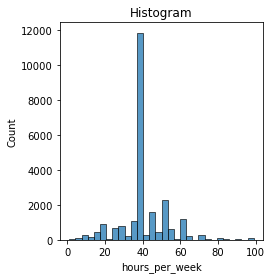

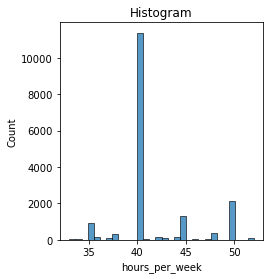

In [24]:
def find_skewed_boundaries(data, variable, hours_per_week):
    IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)

    lower_boundary = data[variable].quantile(0.25) - (IQR * hours_per_week)
    upper_boundary = data[variable].quantile(0.75) + (IQR * hours_per_week)

    return upper_boundary, lower_boundary

# Limits for `Hour per Week`
hour_upper_limit, hour_lower_limit = find_skewed_boundaries(data, 'hours_per_week', 1.5)
hour_upper_limit, hour_lower_limit
print('hour_upper_limit : ', hour_upper_limit)
print('hour_lower_limit : ', hour_lower_limit, '\n')

# Flag the outliers in category `hours_per_week`
outliers_hour = np.where(data['hours_per_week'] > hour_upper_limit, True,
                       np.where(data['hours_per_week'] < hour_lower_limit, True, False))

print(outliers_hour[:10])

# Let's trim the dataset

data_trimmed = data.loc[~(outliers_hour)]
print('Size dataset - Before trimming : ', data.shape)
print('Size dataset - After trimming  : ', data_trimmed.shape)

# Let's find outliers

print('Hour per Week - Before Trimming')
diagnostic_plots(data, 'hours_per_week')
print('\nHour per Week - After Trimming')
diagnostic_plots(data_trimmed, 'hours_per_week')

/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


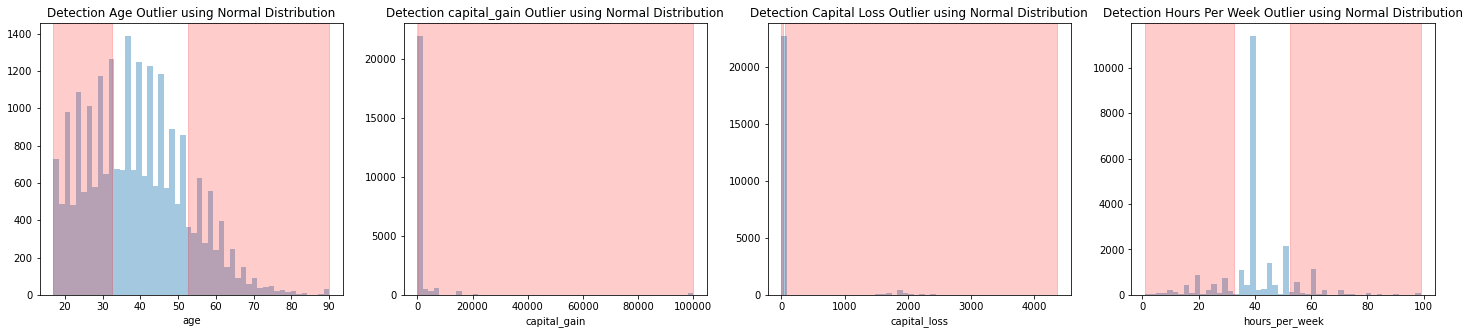

In [25]:
plt.figure(figsize=(25,5))
plt.subplot(1, 4, 1)
sns.distplot(data['age'], kde=False)
plt.axvspan(xmin = lower, xmax= data['age'].min(), alpha=0.2, color='red')
plt.axvspan(xmin = upper, xmax= data['age'].max(), alpha=0.2, color='red')
plt.title('Detection Age Outlier using Normal Distribution')

plt.subplot(1, 4, 2)
sns.distplot(data['capital_gain'], kde=False)
plt.axvspan(xmin = lower, xmax= data['capital_gain'].min(), alpha=0.2, color='red')
plt.axvspan(xmin = upper, xmax= data['capital_gain'].max(), alpha=0.2, color='red')
plt.title('Detection capital_gain Outlier using Normal Distribution')

plt.subplot(1, 4, 3)
sns.distplot(data['capital_loss'], kde=False)
plt.axvspan(xmin = lower, xmax= data['capital_loss'].min(), alpha=0.2, color='red')
plt.axvspan(xmin = upper, xmax= data['capital_loss'].max(), alpha=0.2, color='red')
plt.title('Detection Capital Loss Outlier using Normal Distribution')

plt.subplot(1, 4, 4)
sns.distplot(data['hours_per_week'], kde=False)
plt.axvspan(xmin = lower, xmax= data['hours_per_week'].min(), alpha=0.2, color='red')
plt.axvspan(xmin = upper, xmax= data['hours_per_week'].max(), alpha=0.2, color='red')
plt.title('Detection Hours Per Week Outlier using Normal Distribution')

plt.show()


#### Detect Missing Value

*Kali ini kita akan mendeteksi adanya oulier pada dataset*

In [26]:
def missing_values_table_(data) :

    # Total missing values
    mis_val = data.isnull().sum()

    # Precentage of missing values
    mis_val_percent = 100 * data.isnull().sum() / len(data)

    # Make a table with the result
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] !=0].sort_values('% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [27]:
train_missing = missing_values_table_(X_train)
train_missing

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [28]:
train_missing = missing_values_table_(X_test)
train_missing

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


**Missing Value di kolom target**

In [29]:
# Cek missing value di y_train
print('missing values di y_train :', y_train.isna().any())

# Cek missing value di X
print('missing values di y_test :', y_test.isna().any())

missing values di y_train : False
missing values di y_test : False


#### Feature Selection

Feature selection memilih feature yang berpengaruh dan mengesampingkan feature yang tidak berpengaruh dalam suatu kegiatan pemodelan atau penganalisaan data

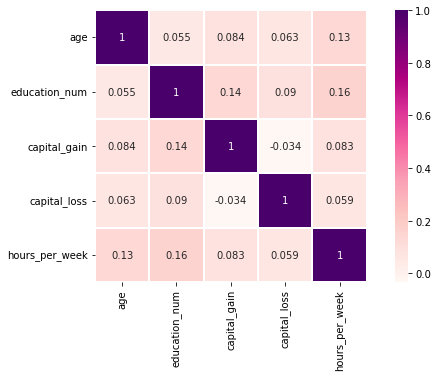

In [30]:
# Check korelasi antara kolom

# Heatmap
corrmat = data.corr()
top_corr_feature = corrmat.index

plt.figure(figsize=(10,5))
g = sns.heatmap(data[top_corr_feature].corr(), annot=True, cmap='RdPu', square=5, linewidths=0.02)

**Column Categorization**

In [31]:
# Get Numerical Columns and Categorical Columns
num_column = X_train.select_dtypes(include=np.number).columns.tolist()
cat_column = X_train.select_dtypes(include='object').columns.tolist()
y_column = y_test.tolist()

print('numerical columns :', num_column)
print('-------------------------------------------------------------------------------' )
print('categorical columns :', cat_column)
print('-------------------------------------------------------------------------------' )

# Combine two category
final_feature = num_column + cat_column

numerical columns : ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
-------------------------------------------------------------------------------
categorical columns : ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country']
-------------------------------------------------------------------------------


In [32]:
# Use selected variables
X_train = X_train[final_feature]
X_test = X_test[final_feature]

In [33]:
# Split Train-Set and Test-Set based on Column Type

X_train_num = X_train[num_column]
X_train_cat = X_train[cat_column]

X_test_num = X_test[num_column]
X_test_cat = X_test[cat_column]

#### Feature Scaling

In [34]:
# Display X_train_num

X_train_num

,age,education_num,capital_gain,capital_loss,hours_per_week
9857,62,13,0,0,55
14879,18,8,0,0,30
19089,39,4,0,0,40
19703,28,9,0,0,40
20722,40,13,2977,0,40
...,...,...,...,...,...
9529,41,13,0,0,40
406,35,9,0,0,40
13702,46,10,0,0,48
2191,23,7,0,0,40


In [35]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.61643836, 0.8       , 0.        , 0.        , 0.55102041],
       [0.01369863, 0.46666667, 0.        , 0.        , 0.29591837],
       [0.30136986, 0.2       , 0.        , 0.        , 0.39795918],
       ...,
       [0.39726027, 0.6       , 0.        , 0.        , 0.47959184],
       [0.08219178, 0.4       , 0.        , 0.        , 0.39795918],
       [0.69863014, 1.        , 0.        , 0.        , 0.5       ]])

In [36]:
# Feature Encoding Using One Hot Encoder

encoder = OneHotEncoder()
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

X_train_cat_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

***Encode Kolom Target***

Karena target berupa categories, maka mari kita encode terlebih dahulu

In [37]:
y_train_num = pd.get_dummies(y_train)
y_test_num = pd.get_dummies(y_test)

In [38]:
label1 = pd.DataFrame(y_train_num)
label2 = pd.DataFrame(y_test_num)
y_train_encode = label1.apply(lambda x:x.argmax(), axis=1).values
y_test_encode = label2.apply(lambda x:x.argmax(), axis=1).values

#### Concate between Numerical Columns and Categorical Columns


In [39]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final

array([[0.61643836, 0.8       , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.01369863, 0.46666667, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.30136986, 0.2       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.39726027, 0.6       , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.08219178, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.69863014, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# 6 - Model Definition

1. Algoritma yang dipakai adalah `Logistic Regression` dan `SVM Regression`
2. Metrics yang dipakai untuk mengevaluasi `Mean Absolute Error (MAE)`

In [40]:
# Model yang digunakan

log_model = LogisticRegression()

In [41]:
log_model.fit(X_train_cat_encoded, y_train)

/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
logreg_pred_train = log_model.predict(X_train_cat_encoded)
logreg_pred_test = log_model.predict(X_test_cat_encoded)


In [43]:
# SVM Regression - 1
svm_reg1 = SVR(kernel="linear", degree=3, C=0.001, epsilon=0.01, gamma="scale")

# SVM Reression - 2
svm_reg2 = SVR(kernel="poly", degree=5, C=0.001, epsilon=0.01, gamma="scale")

# 7 - Model Training

Pada sub bab ini berisikan Model Training menggunakan Cross Validation

- MAE = secara umum digunakan untuk pengukuran prediksi error pada analisis time series
- MSE = menghitung nilai MSE sama halnya dengan RMSE. Hanya saja tidak menggunakan proses akar
- RMSE =  jumlah dari kesalahan kuadrat atau selisih antara nilai sebenarnya dengan nilai prediksi yang telah ditentukan
- r2score = mewakili koefisien seberapa baik nilai-nilai tersebut dibandingkan dengan nilai aslinya. Nilai dari 0 sampai 1 diartikan sebagai persentase. Semakin tinggi nilainya, semakin baik modelnya

> Dalam model regresi, untuk mengetahui keakuratan kinerja model suatu algoritma, kita dapat mengambilnya dari nilai yang memiliki kesalahan kecil. Dengan kata lain, semakin kecil nilai error yang dihasilkan maka semakin dekat nilai atau jarak antara nilai aktual dengan nilai prediksi

****Hyperparameter Tuning****

In [44]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001],
               'gamma': [0.001]},
              {'kernel': ['linear'],
               'C': [0.001]},
              {'kernel': ['poly'],
               'degree': [2,3,5],
               'epsilon': [0.001],
               'C': [1]}]

In [45]:
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring="r2")

In [46]:
grid_search.fit(X_train_final, y_train_encode)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.001, 'kernel': 'linear'}
Best cross-validation score: 0.25


In [47]:
param_new=grid_search.best_estimator_
param_new

SVR(C=0.001, kernel='linear')

In [48]:
y_train_pred = param_new.predict(X_train_final)
y_test_pred = param_new.predict(X_test_final)

In [49]:
print('MAE train = ', mean_absolute_error(y_train_encode, y_train_pred))
print('MAE test = ', mean_absolute_error(y_test_encode, y_test_pred))

print('MSE train = ', mean_squared_error(y_train_encode, y_train_pred))
print('MSE test = ', mean_squared_error(y_test_encode, y_test_pred))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train_encode, y_train_pred)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test_encode, y_test_pred)))

print('r2score train = ', r2_score(y_train_encode, y_train_pred))
print('r2score test = ', r2_score(y_test_encode, y_test_pred))

MAE train =  0.27923447861654
MAE test =  0.2799359054749096
MSE train =  0.15324675765706805
MSE test =  0.1530702265403175
RMSE train =  0.39146744137548406
RMSE test =  0.39124190284313554
r2score train =  0.24919683889860267
r2score test =  0.2549647660850143


****Cross-Validation Process****

****Pemilihan SVM****
- untuk model kali ini memilih SVM Regression yang mana dataset masuk ke dalam satu zona dengan tetap meminimalisir nilai epsilon.
- kernel yang mana menjelaskan tentang cara merubah data dari dua dimensi menjadi multi dimensi. Ada beberapa kernel yaitu linear, `polinomial`, radial basis function (rbf) atau gaussian, dan sigmoid.


In [50]:
# Model SVM Regression

svm_reg1.fit(X_train_num_scaled, y_train_encode)
y_pred_train1 = svm_reg1.predict(X_train_num_scaled)
y_pred_test1 = svm_reg1.predict(X_test_num_scaled)

# Model Evaluation using MAE

print('MAE train = ', mean_absolute_error(y_train_encode, y_pred_train1))
print('MAE test = ', mean_absolute_error(y_test_encode, y_pred_test1))

print('MSE train = ', mean_squared_error(y_train_encode, y_pred_train1))
print('MSE test = ', mean_squared_error(y_test_encode, y_pred_test1))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train_encode, y_pred_train1)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test_encode, y_pred_test1)))

print('r2score train = ', r2_score(y_train_encode, y_pred_train1))
print('r2score test = ', r2_score(y_test_encode, y_pred_test1))

MAE train =  0.28538127076114794
MAE test =  0.28832198935242975
MSE train =  0.26872478804161376
MSE test =  0.2716528740882208
RMSE train =  0.5183867166909408
RMSE test =  0.521203294395019
r2score train =  -0.31656567102998023
r2score test =  -0.3222098586016502


In [51]:
# Model SVM Regression

svm_reg2.fit(X_train_num_scaled, y_train_encode)
y_pred_train2 = svm_reg2.predict(X_train_num_scaled)
y_pred_test2 = svm_reg2.predict(X_test_num_scaled)

# Model Evaluation using MAE

print('MAE train = ', mean_absolute_error(y_train_encode, y_pred_train2))
print('MAE test = ', mean_absolute_error(y_test_encode, y_pred_test2))

print('MSE train = ', mean_squared_error(y_train_encode, y_pred_train2))
print('MSE test = ', mean_squared_error(y_test_encode, y_pred_test2))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train_encode, y_pred_train2)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test_encode, y_pred_test2)))

print('r2score train = ', r2_score(y_train_encode, y_pred_train2))
print('r2score test = ', r2_score(y_test_encode, y_pred_test2))

MAE train =  0.2511174298524887
MAE test =  0.2523359070586955
MSE train =  0.1839785000195322
MSE test =  0.1851574741717525
RMSE train =  0.42892715001446596
RMSE test =  0.4302992844192894
r2score train =  0.09863254856937365
r2score test =  0.09878723512357956


# 8 - Model Evaluation

Pada bagian ini merupakan hasil dari proses model training. Dari hasil yangb ditinjau, model paling bagus ada di Logistic Regression dengan Cross-Validation metode SVM.

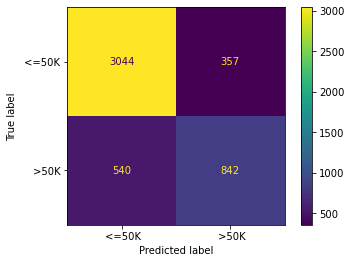

In [52]:
# Logistic Regression - y_test

cm = confusion_matrix(y_test, logreg_pred_test, labels= log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)

disp.plot()
plt.show()

In [53]:
print(classification_report(y_test, logreg_pred_test))

              precision    recall  f1-score   support

       <=50K       0.85      0.90      0.87      3401
        >50K       0.70      0.61      0.65      1382

    accuracy                           0.81      4783
   macro avg       0.78      0.75      0.76      4783
weighted avg       0.81      0.81      0.81      4783



Dari hasil cm diatas ada 357 orang yang masuk ke zona `False Positif` dan 540 masuk ke `False Negative`. Model memprediksi ada 357 orang dengan gaji > 50K, namun sebenarnya bernilai negatif (<=50K). Jika data sensus ini digunakan untuk memprediksi pendapatan Pajak suatu Kota, maka akan terjadi salah prediksi. Tetapi jika False Negative yang mana ada 540 orang di kombinasi dengan False Positive, prediksi mempunyai deviasi 183 orang 

Classification Report menunjukkan bahwa data underfit.

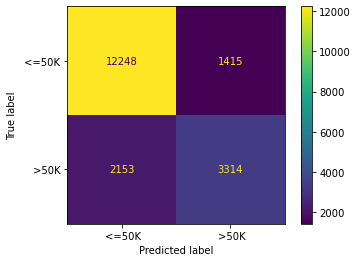

In [54]:
# Logistic Regression - y_train

cm = confusion_matrix(y_train, logreg_pred_train, labels= log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)

disp.plot()
plt.show()

In [65]:
print(classification_report(y_train, logreg_pred_train))

              precision    recall  f1-score   support

       <=50K       0.85      0.90      0.87     13663
        >50K       0.70      0.61      0.65      5467

    accuracy                           0.81     19130
   macro avg       0.78      0.75      0.76     19130
weighted avg       0.81      0.81      0.81     19130



> Prosentase yang didapat dari y_test dan y_train adalah sama
- Dari hasil cm y_train diatas ada 1.415 orang yang masuk ke zona `False Positif` dan 2.153 masuk ke `False Negative`. Model memprediksi ada 1.415 orang dengan gaji > 50K, namun sebenarnya bernilai negatif (<=50K). Jika data sensus ini digunakan untuk memprediksi pendapatan Pajak suatu Kota, maka akan terjadi salah prediksi. Tetapi jika False Negative yang mana ada 2.153 orang di kombinasi dengan False Positive, prediksi mempunyai deviasi 738 orang 

# 9 - Model Saving

In [56]:
# Save the Files

import joblib
import json

with open('model_lin_reg.pkl', 'wb') as file_1:
  joblib.dump(log_model, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
  joblib.dump(encoder, file_3)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(num_column, file_4)

with open('list_cat_cols.txt', 'w') as file_5:
  json.dump(cat_column, file_5)

# 10 - Model Inference


> Dataset yang sudah diproses, mari kita coba dengan data yang baru

**Load Model**

In [57]:
# Load All Files
with open('model_lin_reg.pkl', 'rb') as file_1:
  model_lin_reg = joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = joblib.load(file_2)

with open('model_encoder.pkl', 'rb') as file_3:
  model_encoder = joblib.load(file_3)

with open('list_num_cols.txt', 'r') as file_4:
  list_num_cols = json.load(file_4)

with open('list_cat_cols.txt', 'rb') as file_5:
  list_cat_cols = json.load(file_5)

In [58]:
inf_set

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
6214,37,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,>50K
14867,17,Private,12th,8,Never-married,Sales,Own-child,White,Female,0,0,6,United-States,<=50K
9,40,Local-gov,9th,5,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,Yugoslavia,>50K
18243,20,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,20,United-States,<=50K
11156,58,Private,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
10219,46,Local-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,>50K
7752,48,Self-emp-not-inc,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,England,<=50K
8001,39,Private,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,49,United-States,<=50K
6050,57,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
19477,34,Private,HS-grad,9,Never-married,Other-service,Unmarried,Black,Female,0,0,40,United-States,<=50K


In [59]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = inf_set[list_num_cols]
data_inf_cat = inf_set[list_cat_cols]

In [60]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)
data_inf_cat_encoded = model_encoder.transform(data_inf_cat).toarray()

In [61]:
# Concate the Columns

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)
data_inf_final

array([[0.2739726 , 0.53333333, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.46666667, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.31506849, 0.26666667, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.30136986, 0.53333333, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.05479452, 0.6       , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.35616438, 0.33333333, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [62]:
# Predict using Logistic Regression

y_pred_inf = param_new.predict(data_inf_final)
y_pred_inf

array([ 0.10676189, -0.04451249,  0.1102452 , -0.09027448,  0.48445367,
        0.73635626,  0.62627222,  0.17293767,  0.10229263, -0.09921418,
       -0.09928667,  0.1018223 ,  0.47690017, -0.07586667, -0.11136252])

In [63]:
# Create Dataframe of Rating's Prediction

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['income_bracket - Prediction'])
y_pred_inf_df

,income_bracket - Prediction
0,0.106762
1,-0.044512
2,0.110245
3,-0.090274
4,0.484454
5,0.736356
6,0.626272
7,0.172938
8,0.102293
9,-0.099214


Hasil minus (-) disini menunjukkan masuk kategori <= 50 K, dan (+) menunjukkan masuk ke kategori >50K

In [64]:
# Concate between Inference-Set and Rating's Prediction

inf_set.index = y_pred_inf_df.index
inf_final = pd.concat([inf_set, y_pred_inf_df], axis=1)
inf_final.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
age,37,17,40,20,58,46,48,39,57,34,29,30,39,21,43
workclass,Private,Private,Local-gov,Private,Private,Local-gov,Self-emp-not-inc,Private,Self-emp-not-inc,Private,Private,Private,Self-emp-inc,Private,Self-emp-not-inc
education,HS-grad,12th,9th,Some-college,Assoc-acdm,Bachelors,Masters,Assoc-voc,HS-grad,HS-grad,10th,Some-college,HS-grad,Some-college,10th
education_num,9,8,5,10,12,13,14,11,9,9,6,10,9,10,6
marital_status,Married-civ-spouse,Never-married,Married-civ-spouse,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married,Never-married,Married-civ-spouse,Married-civ-spouse,Never-married,Divorced
occupation,Craft-repair,Sales,Other-service,Other-service,Exec-managerial,Prof-specialty,Sales,Handlers-cleaners,Craft-repair,Other-service,Other-service,Craft-repair,Exec-managerial,Sales,Farming-fishing
relationship,Husband,Own-child,Wife,Own-child,Husband,Husband,Husband,Husband,Husband,Unmarried,Own-child,Husband,Husband,Own-child,Unmarried
race,White,White,White,White,White,Asian-Pac-Islander,White,White,White,Black,Black,White,White,White,White
gender,Male,Female,Female,Male,Male,Male,Male,Male,Male,Female,Female,Male,Male,Male,Male
capital_gain,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Pada `income_bracket - Prediction` angka yang terdiri dari - (minus) merupakan range <=50 K dan untuk + (plus) masuk ke kategori >50 K

***====================================================================KESIMPULANNYA==========================================================================================***


***Problem :***
1. Apakah yang dimaksud dengan coeficient pada logistic regression?
2. Apakah yang dimaksud dengan Support Vector pada SVM?
3. Apakah fungsi parameter kernel pada SVM ? Jelaskan salah satu kernel yang kalian pahami!

***Answer   :***
1. Coeficient pada Log_reg adalah menyatakan hubungan searah atau berbalik arah antara variabel independen dan variabel dependen. Jika koefisien bernilai positif, maka hubungan variabel independen dan variabel dependen adalah hubungan searah (https://agungbudisantoso.com/arti-koefisien-dan-odds-ratio-pada-regresi-logistik/)
2. SVM adalah salah satu metode dalam Supervised Learining yang sangat fleksible, bisa dipakai untuk klasifikasi dan regresi. SVM digunakan juga untuk mencari hyperplane dengan memaksimlakan jarak antar kelas (https://medium.com/@samsudiney/penjelasan-sederhana-tentang-apa-itu-svm-149fec72bd02)
3. kernel yang mana menjelaskan tentang cara merubah data dari dua dimensi menjadi multi dimensi. Ada beberapa kernel yaitu linear, `polinomial`, radial basis function (rbf) atau gaussian, dan sigmoid. Kernel Polynomial adalah fungsi kernel yang cocok dalam SVM dan kernelisasi lainnya yang mana kernel mewakili kesamaan vektor sampel pelatihan dalam ruang fitur (https://www.trivusi.web.id/2022/04/fungsi-kernel-svm.html)

***Model Analysis :***
1. Model yang digunakan merupakan Logistik Regression, hasilnya menunjukkan bahwa data yg diolah merupakan data yang underfit, yang mana model tidak dapat mempelajari hubungan anatar variabel dalam data serta memprediksi atau mengklasifikasi data point baru.
2. Best Param menujukkan bahwa model paling bagus menggunakan `kernel` ='linear', tetapi setelah dicoba hasil f1score menjadi (-) minus, sehingga saya mencoba untuk menggunakan kernel='poly' yang hasilnya masih di range 0-1,


***Overall Analysis :***


1. Data diatas memiliki beberapa kesalahan dalam kategori, contohnya pada hours per week terdapat isinya, tetapi pada capital_gain kosong
2. Jika data di di publish, ada kemungkinan terjadi salah predict yang akan mengakibatkan salah dalam perencanaa. Untuk contoh jika data diolah oleh bagian perpajakan, akan ada beberapa orang yang mempunyai pendapatan >50 K tetapi tidak dikenakan pajak dan <= 50K dikenakan pajak.
3. Data yang diolah kemungkinan besar terjadi human error, karena banyak data yang kosong.